In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
original_df = pd.read_csv("engineering colleges in India.csv")

In [42]:
original_df.head(2)

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6667


In [43]:
df = original_df.copy()

In [44]:
df.head(2)

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6667


In [45]:
df = df.drop(columns=['Courses','Campus Size','Rating','University'])

In [46]:
df.head(2)

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,4811,329,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600
1,Visvesvaraya National Institute of Technology ...,Co-Ed,1071,192,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6667


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   College Name               5445 non-null   object
 1   Genders Accepted           5427 non-null   object
 2   Total Student Enrollments  4442 non-null   object
 3   Total Faculty              5284 non-null   object
 4   Established Year           5344 non-null   object
 5   Facilities                 5433 non-null   object
 6   City                       5445 non-null   object
 7   State                      5445 non-null   object
 8   Country                    5445 non-null   object
 9   College Type               5444 non-null   object
 10  Average Fees               5445 non-null   object
dtypes: object(11)
memory usage: 468.1+ KB


In [48]:
df['Average Fees'] = pd.to_numeric(df['Average Fees'], errors='coerce')
df['Total Student Enrollments'] = pd.to_numeric(df['Total Student Enrollments'], errors='coerce')
df['Total Faculty'] = pd.to_numeric(df['Total Faculty'], errors='coerce')
df['Established Year'] = pd.to_numeric(df['Established Year'], errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               5445 non-null   object 
 1   Genders Accepted           5427 non-null   object 
 2   Total Student Enrollments  4436 non-null   float64
 3   Total Faculty              5278 non-null   float64
 4   Established Year           5338 non-null   float64
 5   Facilities                 5433 non-null   object 
 6   City                       5445 non-null   object 
 7   State                      5445 non-null   object 
 8   Country                    5445 non-null   object 
 9   College Type               5444 non-null   object 
 10  Average Fees               5439 non-null   float64
dtypes: float64(4), object(7)
memory usage: 468.1+ KB


# Line plot   
 - Represents number of colleges established in every year after 1980.

In [69]:
year_groupby = df.groupby(['Established Year'])

In [70]:
len(year_groupby)

110

In [71]:
year_df = year_groupby[['College Name']].count().reset_index()

In [72]:
year_df = year_df.rename(columns={'College Name' : 'College Count'})

In [73]:
year_df.tail(4)

,Established Year,College Count
106,2016,39
107,2017,23
108,2018,5
109,2019,1


In [74]:
x = year_df[year_df['Established Year'] > 1980]['Established Year']
y = year_df[year_df['Established Year'] > 1980]['College Count']

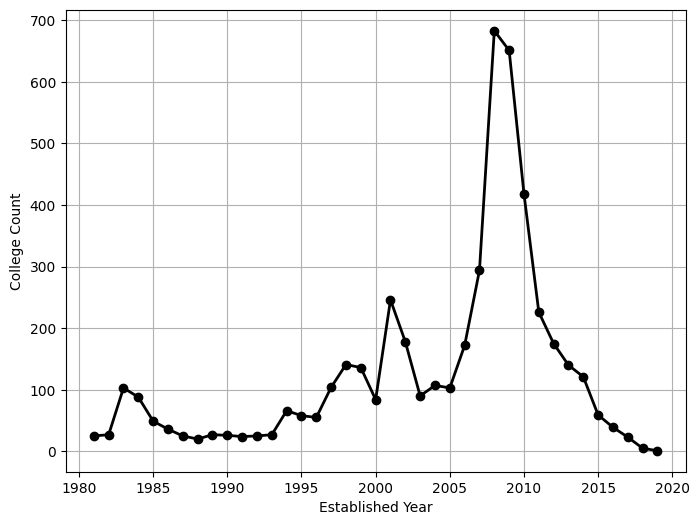

In [75]:
plt.figure(figsize=(8,6))
plt.plot(x,y,linewidth = 2,marker = 'o',c='black')
plt.xlabel('Established Year')
plt.ylabel('College Count')
plt.grid()
plt.show()

# Histogram   
 - Represent the count of students enrolled in each year after 2000

In [78]:
hist_df = df[df['Established Year'] > 2000]

In [79]:
hist_df.head(2)

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,4811.0,329.0,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0000
1,Visvesvaraya National Institute of Technology ...,Co-Ed,1071.0,192.0,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6667


In [80]:
df['Established Year'] = df['Established Year'].astype('Int64')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               5445 non-null   object 
 1   Genders Accepted           5427 non-null   object 
 2   Total Student Enrollments  4436 non-null   float64
 3   Total Faculty              5278 non-null   float64
 4   Established Year           5338 non-null   Int64  
 5   Facilities                 5433 non-null   object 
 6   City                       5445 non-null   object 
 7   State                      5445 non-null   object 
 8   Country                    5445 non-null   object 
 9   College Type               5444 non-null   object 
 10  Average Fees               5439 non-null   float64
dtypes: Int64(1), float64(3), object(7)
memory usage: 473.4+ KB


In [82]:
x = hist_df['Established Year']

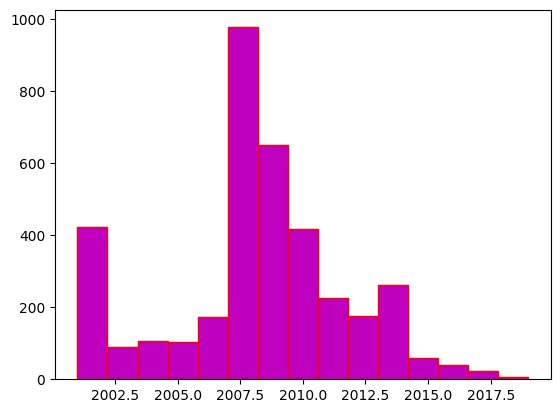

In [83]:
plt.hist(x,color='m',edgecolor='r',bins=15)
plt.show()

In [114]:
df['Total Student Enrollments'].max()

1035081.0

In [146]:
scatter_df = df[df['Average Fees'] < 1000000]

In [139]:
scatter_df = scatter_df[scatter_df['Total Student Enrollments'] < 10000]

In [122]:
scatter_df.head(2)

,College Name,Genders Accepted,Total Student Enrollments,Total Faculty,Established Year,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,4811.0,329.0,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0000
1,Visvesvaraya National Institute of Technology ...,Co-Ed,1071.0,192.0,2007,"Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6667


In [128]:
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 0 to 5443
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               3148 non-null   object 
 1   Genders Accepted           3146 non-null   object 
 2   Total Student Enrollments  3148 non-null   Int64  
 3   Total Faculty              3101 non-null   float64
 4   Established Year           3140 non-null   Int64  
 5   Facilities                 3146 non-null   object 
 6   City                       3148 non-null   object 
 7   State                      3148 non-null   object 
 8   Country                    3148 non-null   object 
 9   College Type               3148 non-null   object 
 10  Average Fees               3148 non-null   float64
dtypes: Int64(2), float64(2), object(7)
memory usage: 301.3+ KB


In [133]:
scatter_df['Average Fees'] = scatter_df['Average Fees'].astype(int)
scatter_df['Total Student Enrollments'] = scatter_df['Total Student Enrollments'].astype(int)

In [134]:
scatter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3148 entries, 0 to 5443
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College Name               3148 non-null   object 
 1   Genders Accepted           3146 non-null   object 
 2   Total Student Enrollments  3148 non-null   int32  
 3   Total Faculty              3101 non-null   float64
 4   Established Year           3140 non-null   Int64  
 5   Facilities                 3146 non-null   object 
 6   City                       3148 non-null   object 
 7   State                      3148 non-null   object 
 8   Country                    3148 non-null   object 
 9   College Type               3148 non-null   object 
 10  Average Fees               3148 non-null   int32  
dtypes: Int64(1), float64(1), int32(2), object(7)
memory usage: 273.6+ KB


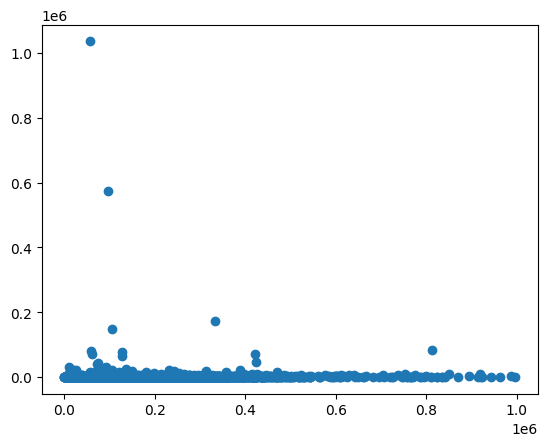

In [147]:
plt.scatter(scatter_df['Average Fees'],scatter_df['Total Student Enrollments'])
plt.show()

# Pie Chart   
 - Number of colleges in each state whose count is greater than 100

In [14]:
states_groupby = df.groupby(['State'])

In [25]:
no_of_colleges = states_groupby[['College Name']].count()

In [28]:
no_of_colleges = no_of_colleges.rename(columns={'College Name' : 'College Count'})

In [30]:
no_of_colleges = no_of_colleges.reset_index()

In [31]:
no_of_colleges

,State,College Count
0,Andaman and Nicobar Islands,1
1,Andhra Pradesh,386
2,Arunachal Pradesh,6
3,Assam,35
4,Bihar,52
5,Chandigarh,8
6,Chhattisgarh,79
7,Dadra and Nagar Haveli,1
8,Delhi,39
9,Goa,13


In [50]:
x = no_of_colleges[no_of_colleges['College Count'] > 100]['College Count']
labels = no_of_colleges[no_of_colleges['College Count'] > 100]['State']

In [79]:
temp = no_of_colleges[no_of_colleges['College Count']>100]
temp

,State,College Count
1,Andhra Pradesh,386
10,Gujarat,241
11,Haryana,262
15,Karnataka,339
16,Kerala,233
17,Madhya Pradesh,261
18,Maharashtra,712
23,Odisha,190
25,Punjab,227
26,Rajasthan,239


In [81]:
max_bool_series = temp['College Count'] == temp['College Count'].max()
max_bool_list = list(max_bool_series)
max_int_list = [float(i*0.3) if i == True else float(i) for i in max_bool_list]

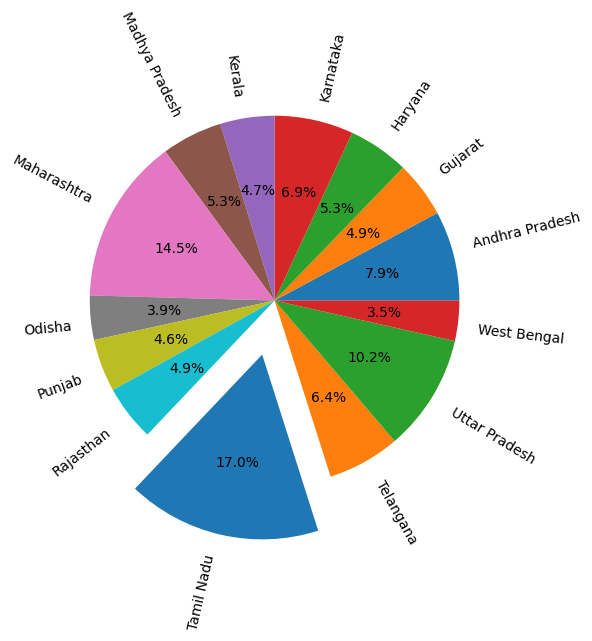

In [85]:
plt.figure(figsize=(8,6))
plt.pie(x,labels=labels,rotatelabels = True,autopct="%0.1f%%",explode=max_int_list)
plt.show()